## PRODIGY INFO TECH DATA SCIENCE INTERN
### PRAGADEESH G

### TASK4:Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the dataset (replace 'IMDB Dataset.csv' with your actual file path)
task4 = pd.read_csv('D:/prodigy info tech/IMDB Dataset.csv')




In [28]:
# Display basic information about the dataset
print(task4.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [29]:
print(task4.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


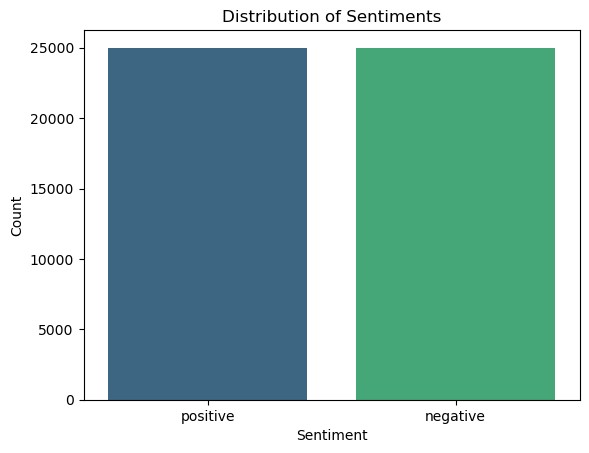

In [30]:
# Visualize the distribution of sentiments
sns.countplot(x='sentiment', data=task4, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [31]:
# Separate positive and negative reviews
positive_text = ' '.join(task4[task4['sentiment'] == 'positive']['review'])
negative_text = ' '.join(task4[task4['sentiment'] == 'negative']['review'])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)


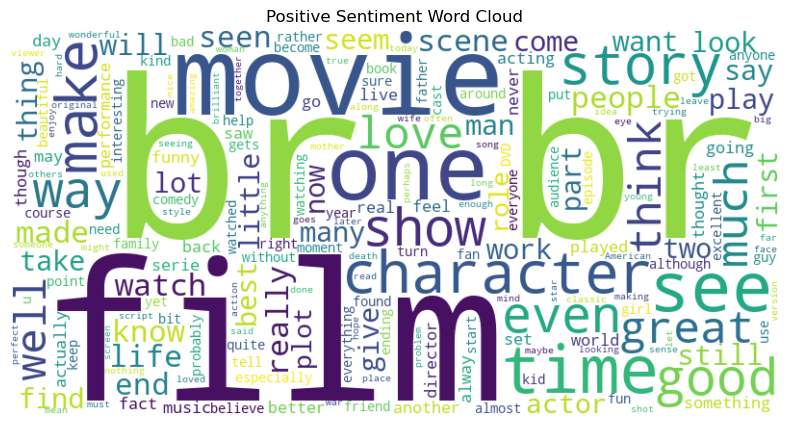

In [32]:
# Plot positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

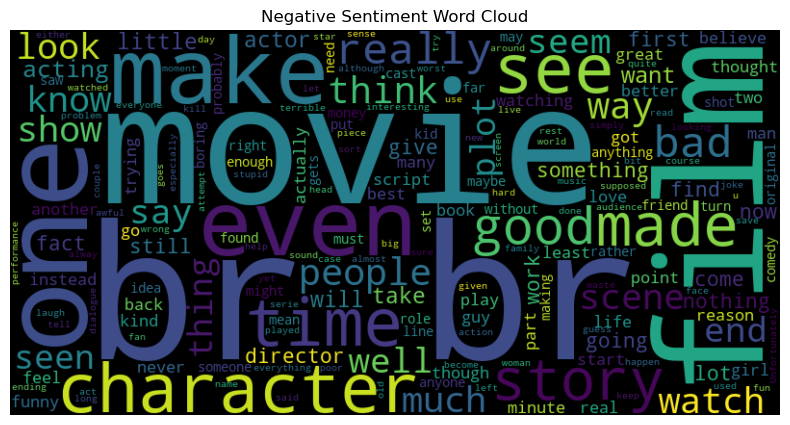

In [33]:

# Plot negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4961
           1       0.83      0.85      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

[[4065  896]
 [ 781 4258]]


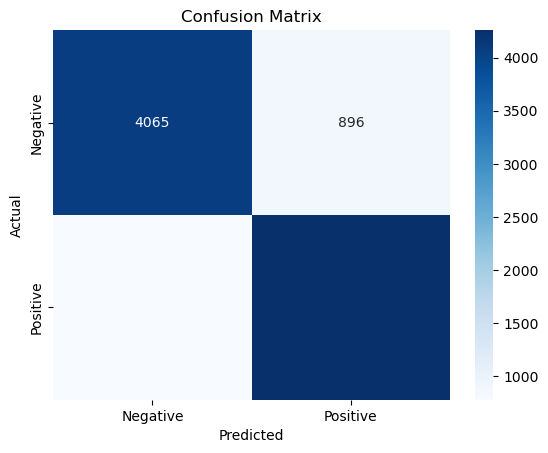

In [34]:
# Prepare the data for modeling
X = task4['review']
y = task4['sentiment']

# Convert sentiment labels to binary values
y = y.map({'positive': 1, 'negative': 0})

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


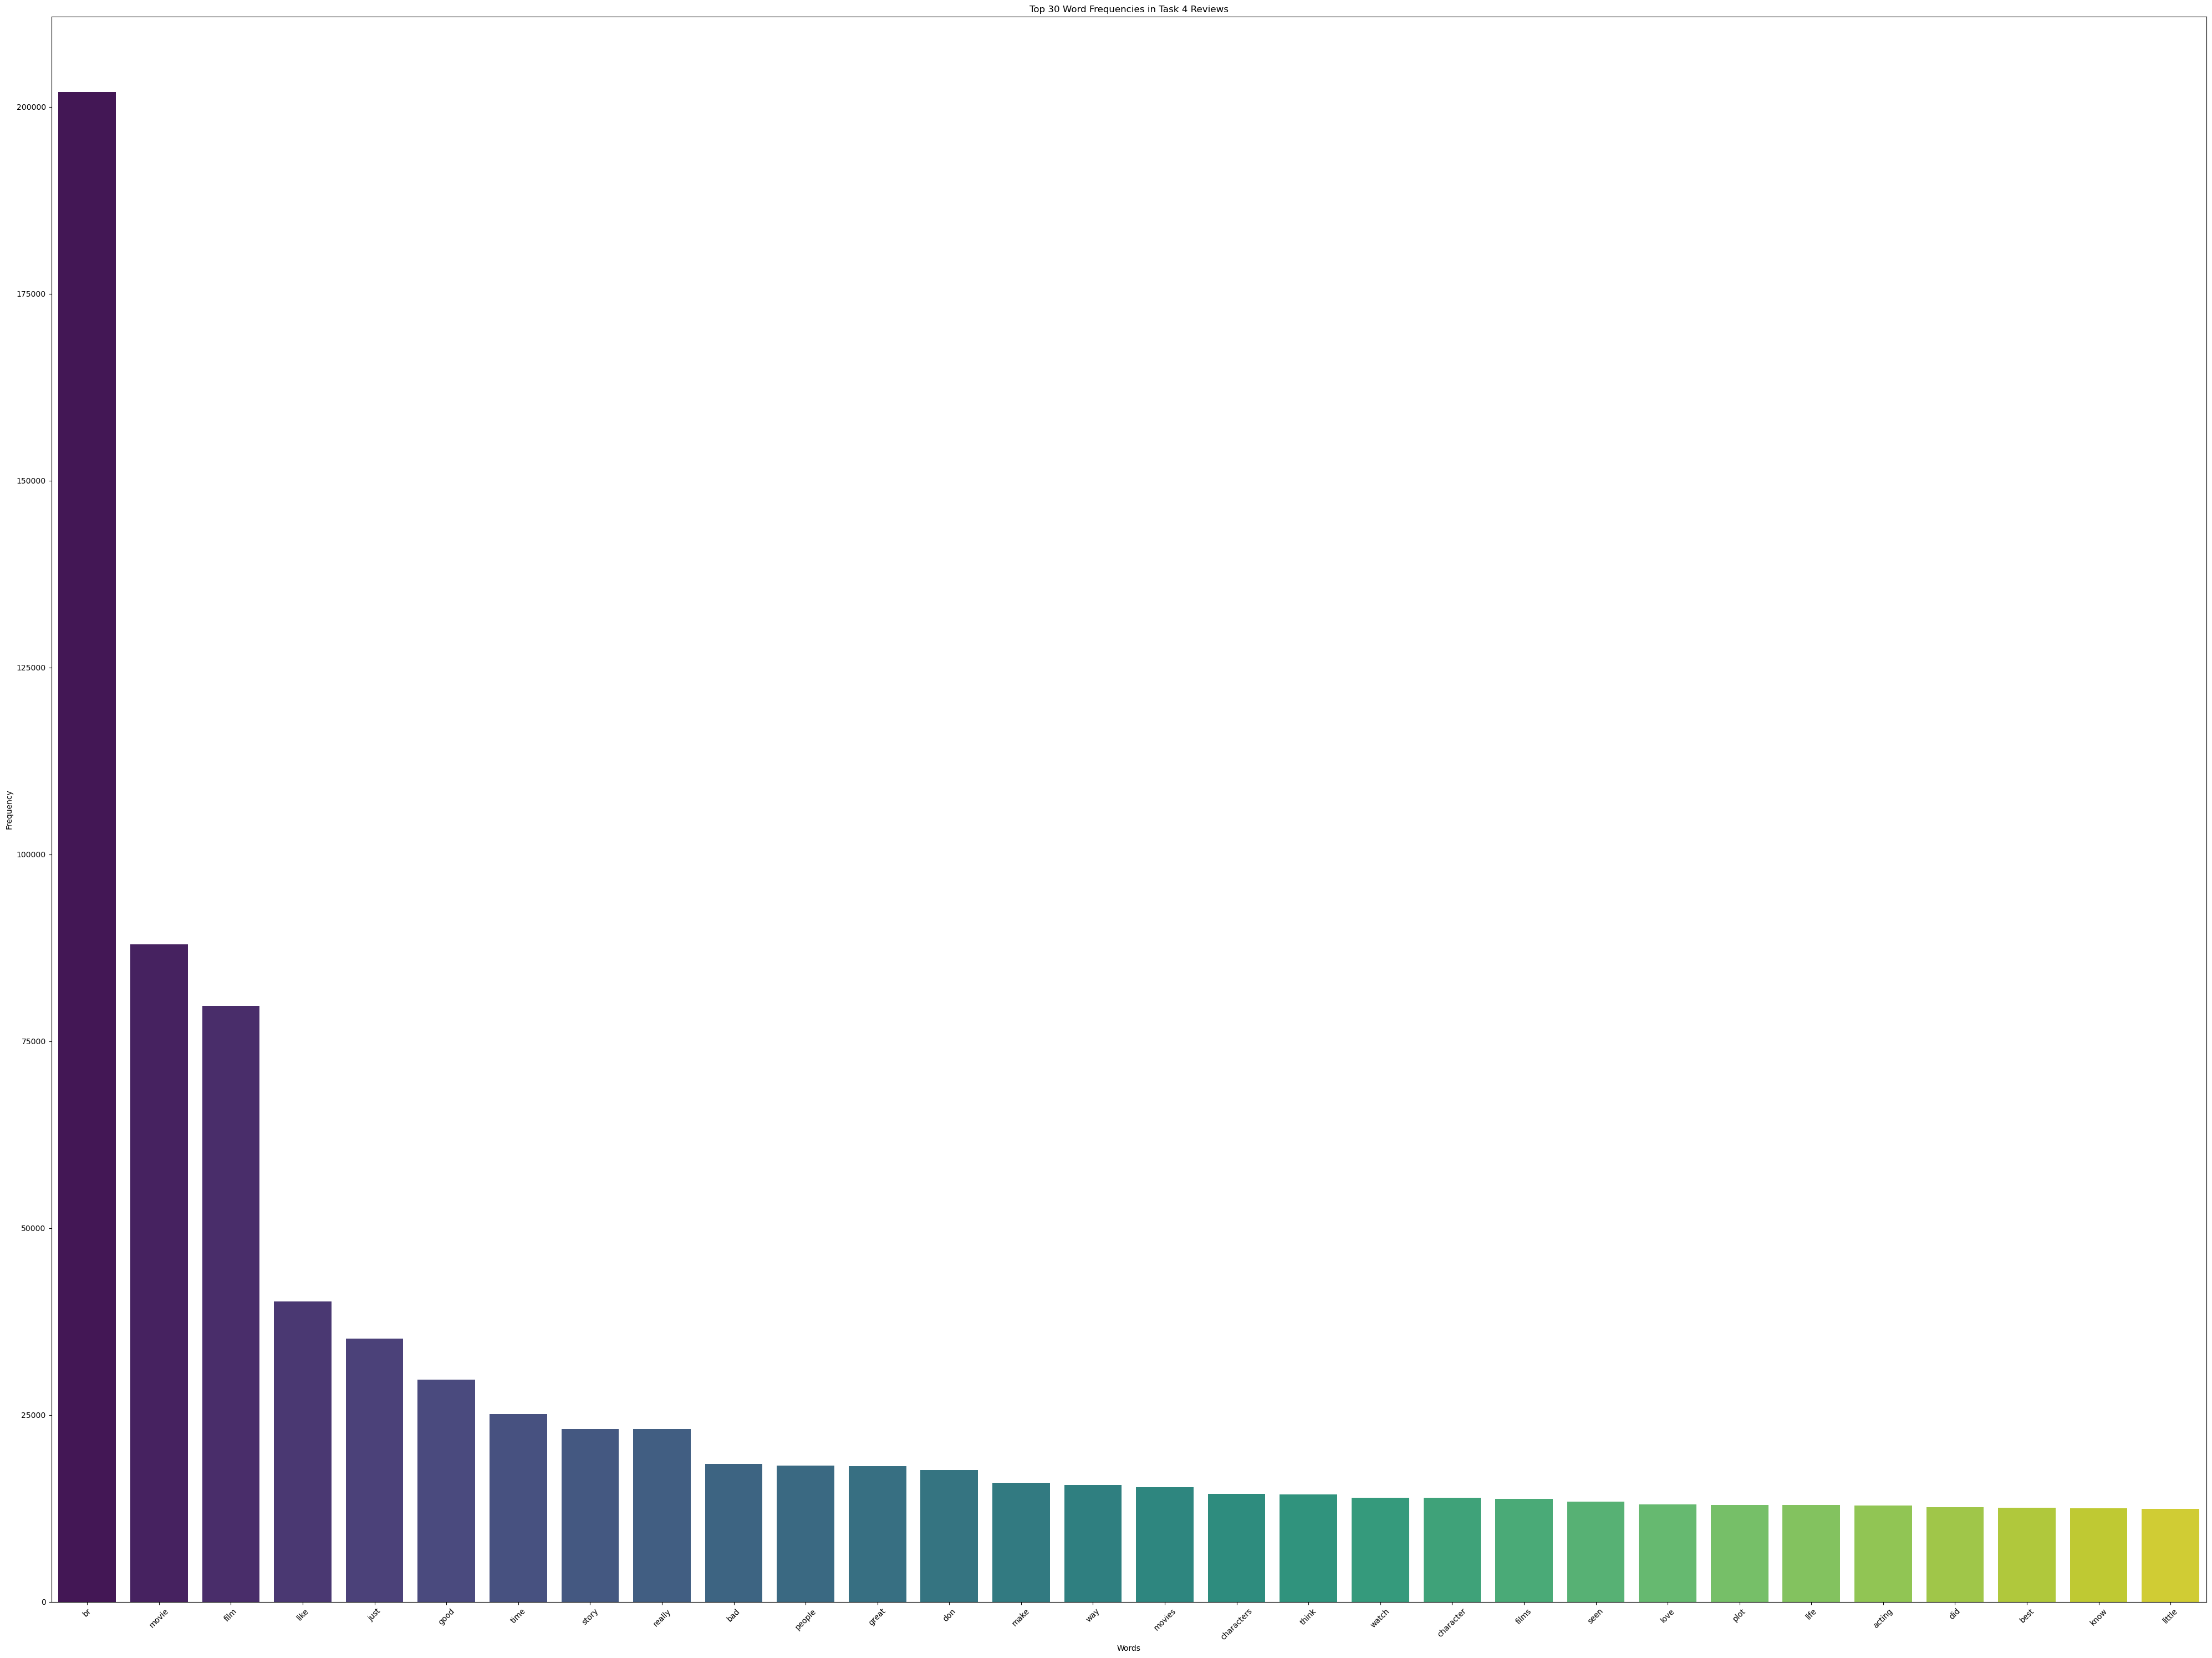

In [35]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(task4['review'])

# Calculate word frequencies directly from the sparse matrix
word_freq = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Plotting word frequencies distribution
plt.figure(figsize=(40, 30))
sns.barplot(x=word_freq.index[:30], y=word_freq.values[:30], palette='viridis')
plt.title('Top 30 Word Frequencies in Task 4 Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


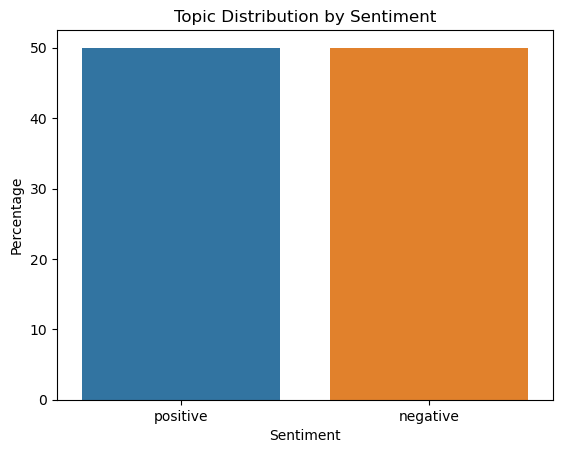

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X)

# Visualize the topic distribution for each sentiment category
sns.barplot(x='sentiment', y=X_topics.argmax(axis=1), data=task4, estimator=lambda x: len(x) / len(task4) * 100)
plt.title('Topic Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


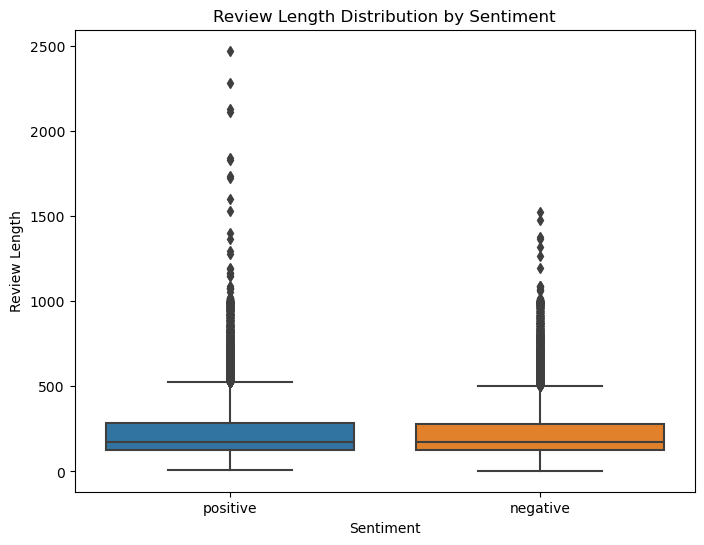

In [40]:
# Calculate review lengths
task4['review_length'] = task4['review'].apply(lambda x: len(x.split()))

# Box plot of review length by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='review_length', data=task4)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


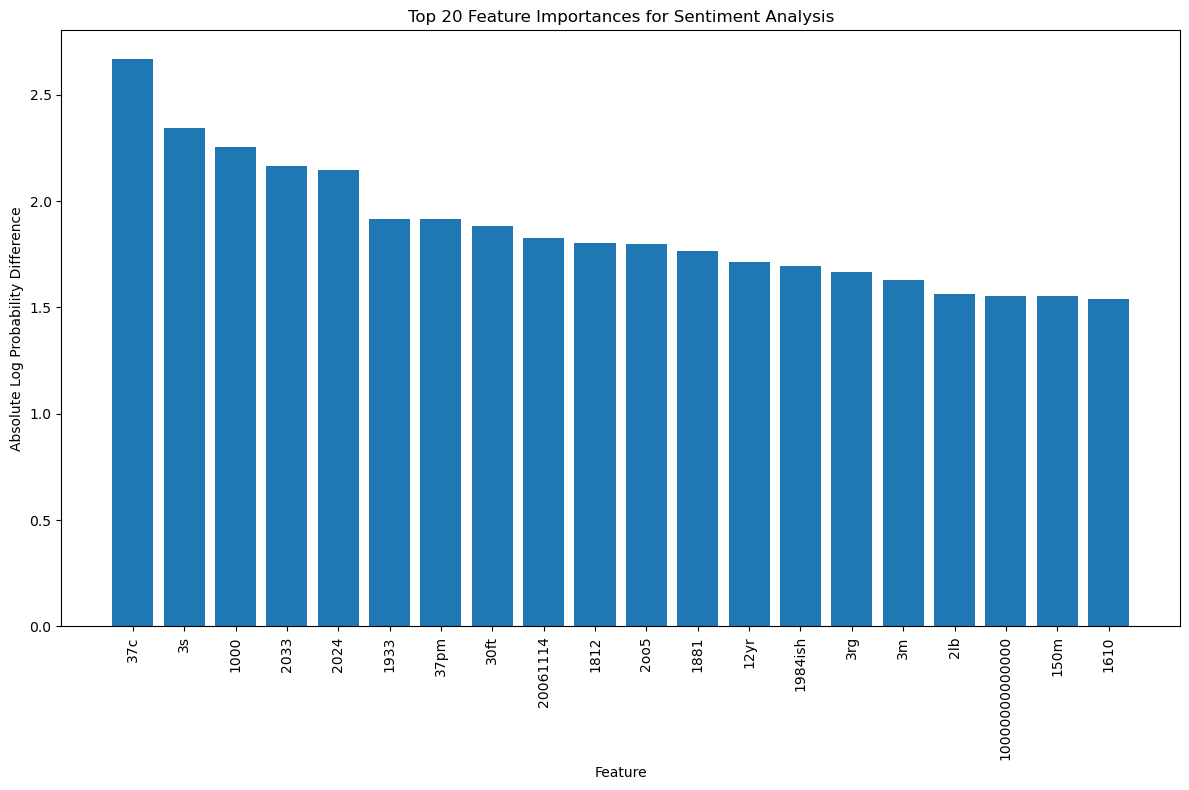

In [41]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Get the feature log probabilities
feature_log_probs = model.feature_log_prob_

# Calculate absolute feature importance (absolute log probabilities)
feature_importances = np.abs(feature_log_probs[1] - feature_log_probs[0])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plotting feature importance
plt.figure(figsize=(12, 8))
plt.bar(range(20), feature_importances[sorted_idx][:20], align='center')
plt.xticks(range(20), np.array(feature_names)[sorted_idx][:20], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Log Probability Difference')
plt.title('Top 20 Feature Importances for Sentiment Analysis')
plt.tight_layout()
plt.show()
